In [ ]:
%load_ext autoreload
%autoreload 2

In [167]:
from IdealObserver import IdealObserver
from ConcentrationBehavior import ConcentrationBehavior
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from plot_utils import *
style.use('seaborn-poster') 
style.use('seaborn-white')

In [161]:
n_pairs = [2, 4, 8, 12]
n_imgs = np.asarray([4, 9, 16, 25])
grid_dims = [[2, 2], [3, 3], [4, 4], [5, 5]]

In [ ]:
grid = np.repeat(np.arange(2), 2)
np.random.shuffle(grid)
print(grid.reshape((2, 2)))

In [134]:
io = IdealObserver([2, 2], 2)

for t in range(4):
    print(io.grid())
    card_a = np.random.choice(4)
    card_b = io.choice(card_a, grid[card_a])
    io.feedback(card_b, grid[card_b])
    print(io.grid())
    print('Trial %d: card_a=%d, grid[card_a]=%d, card_b=%d, grid[card_b]=%d' % (t, card_a, grid[card_a], card_b, grid[card_b]))

[['?' '?']
 ['?' '?']]
[['?' '?']
 ['1' '0']]
Trial 0: card_a=3, grid[card_a]=0, card_b=2, grid[card_b]=1
[['?' '?']
 ['1' '0']]
[['0' '?']
 ['1' '0']]
Trial 1: card_a=2, grid[card_a]=1, card_b=0, grid[card_b]=0
[['0' '?']
 ['1' '0']]
[['0' '1']
 ['1' '0']]
Trial 2: card_a=1, grid[card_a]=1, card_b=2, grid[card_b]=1
[['0' '1']
 ['1' '0']]
[['0' '1']
 ['1' '0']]
Trial 3: card_a=1, grid[card_a]=1, card_b=2, grid[card_b]=1


In [142]:
fns = ["aidapiccato-concentration-ios-20200127-142123.mwk2", "aidapiccato-concentration-ios-20200127-111036.mwk2"]
behave = ConcentrationBehavior(fns)


In [143]:
trials_metadata, block_metadata = behave.get_metadata()

In [159]:
data = {'success': [], 'card_b': [], 'trial_index': []}
for block_index, block in block_metadata.iterrows():
    grid_r = block.grid    
    io = IdealObserver(block.grid_dims, block.n_pairs)
    trials = trials_metadata[trials_metadata.block_index == block_index]
    for trial_index, trial in trials.iterrows():
        card_a = trial.card_a
        card_a_img = grid_r[card_a]
        card_b = io.choice(card_a, card_a_img)
        card_b_img = grid_r[card_b]
        io.feedback(card_b, card_b_img)
        data['success'].append(card_b_img == card_a_img)
        data['card_b'].append(card_b)
        data['trial_index'].append(trial_index)
    # print(block.iloc[0, :])
    # io =  IdealObserver()
    # for trial_index, trial in block.iterrows():
data = pd.DataFrame(data)       
data = data.join(trials_metadata, on='trial_index')

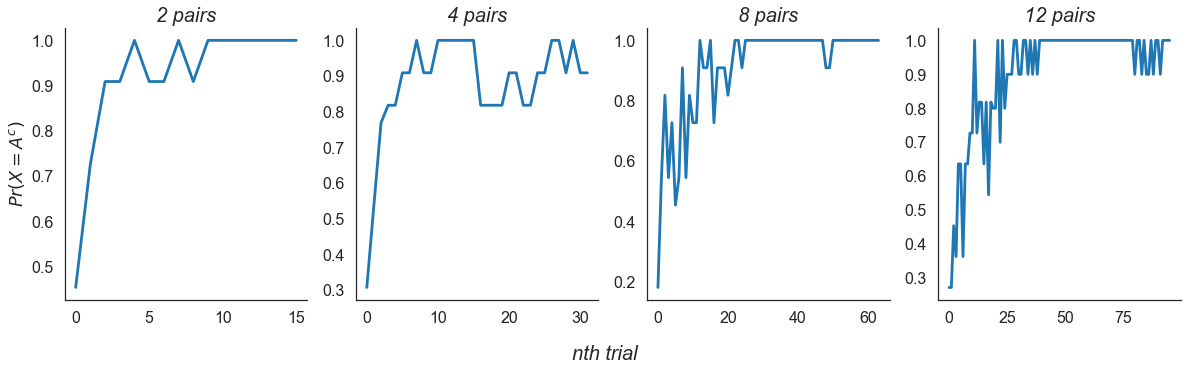

In [168]:
df = pd.concat([data.success, data.n_pairs, data.trial_in_block_index], axis=1)
df = df.groupby(['n_pairs', 'trial_in_block_index'])['success'].apply(np.mean).unstack()
nrows, ncols = 1, 4
f, axs = plt.subplots(nrows, ncols, figsize=(20, 5))
max_n_trials = n_imgs.max() * 4
for i, k in enumerate(n_pairs):
    n_trials = k * 2 * 4
    axs[i].plot(np.arange(n_trials), df.iloc[i, :n_trials].values, label=k) 
for i, ax in enumerate(axs):
    ax.set_title('%d pairs' % (n_pairs[i]))
    prettify(ax)
axs[0].set_ylabel('$Pr(X = A^c)$')
plt.suptitle('nth trial', y = 0.0, fontsize = 20, style='italic')
plt.show()

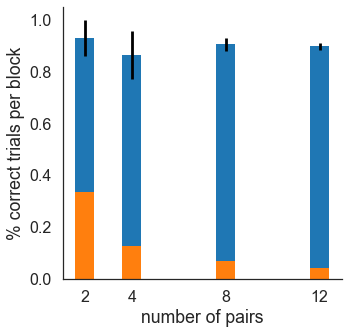

In [170]:


f, axs = plt.subplots(1, 1, figsize=(5, 5))
df = pd.concat([data.n_pairs, data.success, data.block_index], axis=1)
mean = df.groupby(['n_pairs', 'block_index'])['success'].apply(np.mean).mean(level=0)
std = df.groupby(['n_pairs', 'block_index'])['success'].apply(np.mean).std(level=0)
chance = 1/(n_imgs - 1)
axs.bar(n_pairs, mean, yerr=std)
axs.bar(n_pairs, chance)
axs.set_xticks(n_pairs)
axs.set_xlabel('number of pairs')
axs.set_ylabel('% correct trials per block')
prettify(axs)
plt.show()